In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [3]:
# Import fullly preprocessed dataset
filepath = "../data_processing/processed_merged_data/full_dataset.csv"
df = pd.read_csv(filepath)

In [13]:
# Define mapping function
def add_mapping_cols(df):
    # Define filepath 
    filepath_geo = "../data_processing/shape_data/LAD_MAY_2022_UK_BFC_V3.shp"
    
    # Load geographical data
    geo_df = gpd.read_file(filepath_geo)
    
    # Rename the merging column in the geographical DataFrame
    geo_df.rename(columns={'LAD22CD': 'LACD'}, inplace=True)
    
    # Merge geographical data with the main DataFrame
    merged_df = pd.merge(df, geo_df, on='LACD', how='left')
    
    # Convert the merged DataFrame to a GeoDataFrame
    geo_merged_df = gpd.GeoDataFrame(merged_df)
    
    return geo_merged_df

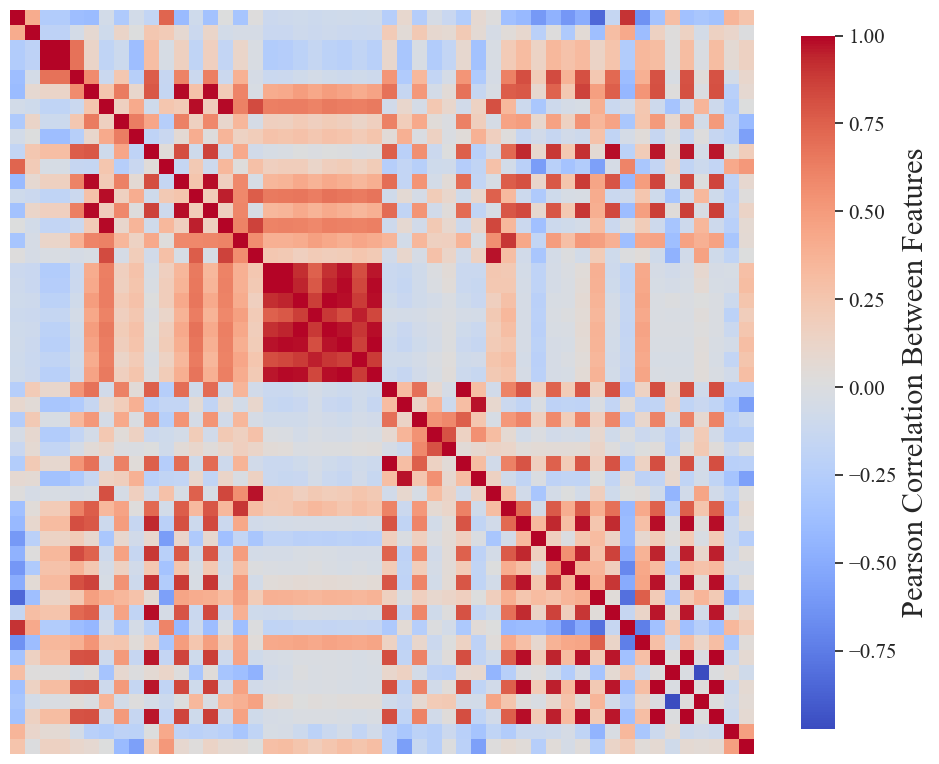

In [14]:
# Define non-numeric columns
non_num_cols = ["LACD", "LANM", "Region", "Authority_Type"]

# Correlation matrix plot
corr_matrix = df[df.columns.difference(non_num_cols)].corr()
plt.figure(figsize=(12, 12))
sns.set(font="Times New Roman")
heatmap = sns.heatmap(corr_matrix,
                      annot=False, 
                      cmap='coolwarm', 
                      xticklabels=False, 
                      yticklabels=False, 
                      square=True, 
                      cbar_kws={"shrink": 0.75})

# Customise color bar
colorbar = heatmap.collections[0].colorbar
colorbar.set_label("Pearson Correlation Between Features",
                   fontsize=22,
                   family='Times New Roman')

# Customise color bar ticks
colorbar.ax.tick_params(labelsize=15)

# Save figure
plt.savefig("./figures/corrplot.png", dpi=300, bbox_inches='tight')

# Show figure
plt.show()